### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
ingreso_total_tienda1 = sum(tienda1["Precio"])
print(f"El ingreso total de la tienda 1 es de {ingreso_total_tienda1}")
ingreso_total_tienda2 = sum(tienda2['Precio'])
print(f"El ingreso total de la tienda 2 es de {ingreso_total_tienda2}")
ingreso_total_tienda3 = sum(tienda3['Precio'])
print(f"El ingreso total de la tienda 3 es de {ingreso_total_tienda3}")
ingreso_total_tienda4 = sum(tienda4['Precio'])
print(f"El ingreso total de la tienda 4 es de {ingreso_total_tienda4}")

diferencia_tienda1_tienda4 = ingreso_total_tienda1 - ingreso_total_tienda4
print(f"La diferencia entre la tienda 1 y la tienda 4 es de: {diferencia_tienda1_tienda4}")



El ingreso total de la tienda 1 es de 1150880400.0
El ingreso total de la tienda 2 es de 1116343500.0
El ingreso total de la tienda 3 es de 1098019600.0
El ingreso total de la tienda 4 es de 1038375700.0
La diferencia entre la tienda 1 y la tienda 4 es de: 112504700.0


<ipython-input-28-a99a127f9673>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


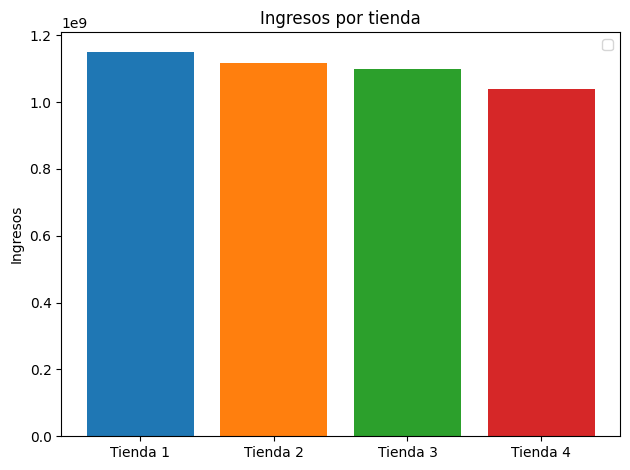

In [ ]:
ingresos_totales = ingreso_total_tienda1, ingreso_total_tienda2, ingreso_total_tienda3, ingreso_total_tienda4

fig, ax = plt.subplots()

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = ingresos_totales
bar_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

ax.bar(tiendas, ingresos, color=bar_colors)

ax.set_ylabel('Ingresos')
ax.set_title('Ingresos por tienda')
ax.legend()
fig.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
cantidad_vendida_tienda1 = tienda1.groupby('Categoría del Producto')['Precio'].count().sort_values(ascending=False).head(3)
print(cantidad_vendida_tienda1)

Categoría del Producto
Muebles         465
Electrónicos    448
Juguetes        324
Name: Precio, dtype: int64


In [ ]:
cantidad_vendida_tienda2 = tienda2.groupby('Categoría del Producto')['Precio'].count().sort_values(ascending=False).head(3)
print(cantidad_vendida_tienda2)

Categoría del Producto
Muebles         442
Electrónicos    422
Juguetes        313
Name: Precio, dtype: int64


In [ ]:
cantidad_vendida_tienda3 = tienda3.groupby('Categoría del Producto')['Precio'].count().sort_values(ascending=False).head(3)
print(cantidad_vendida_tienda3)

Categoría del Producto
Muebles         499
Electrónicos    451
Juguetes        315
Name: Precio, dtype: int64


In [ ]:
cantidad_vendida_tienda4 = tienda4.groupby('Categoría del Producto')['Precio'].count().sort_values(ascending=False).head(3)
print(cantidad_vendida_tienda4)

Categoría del Producto
Muebles         480
Electrónicos    451
Juguetes        338
Name: Precio, dtype: int64


# 3. Calificación promedio de la tienda


In [ ]:
def promedio_1 ():
  return round(sum(tienda1['Calificación'])/len(tienda1['Calificación']),2)


def promedio_2 ():
  return round(sum(tienda2['Calificación'])/len(tienda2['Calificación']),2)


def promedio_3 ():
  promedio_cal_tienda3 = round(sum(tienda3['Calificación'])/len(tienda3['Calificación']),2)
  return promedio_cal_tienda3


def promedio_4 ():
  return round(sum(tienda4['Calificación'])/len(tienda4['Calificación']),2)


calificacion_tienda1 = promedio_1 ()
calificacion_tienda2 = promedio_2 ()
calificacion_tienda3 = promedio_3 ()
calificacion_tienda4 = promedio_4 ()
print(f'La calificación promedio de la tienda 1 es de {calificacion_tienda1}')
print(f'La calificación promedio de la tienda 2 es de {calificacion_tienda2}')
print(f'La calificación promedio de la tienda 3 es de {calificacion_tienda3}')
print(f'La calificación promedio de la tienda 4 es de {calificacion_tienda4}')

La calificación promedio de la tienda 1 es de 3.98
La calificación promedio de la tienda 2 es de 4.04
La calificación promedio de la tienda 3 es de 4.05
La calificación promedio de la tienda 4 es de 4.0


<ipython-input-30-25d8aaa4eaab>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


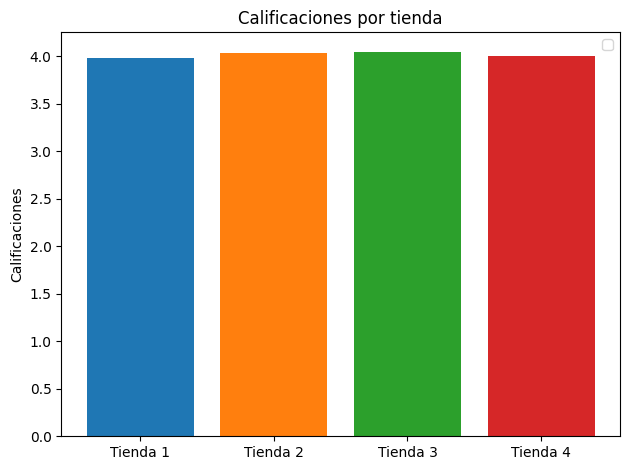

In [ ]:
calificaciones_tiendas = calificacion_tienda1, calificacion_tienda2, calificacion_tienda3, calificacion_tienda4

fig, ax = plt.subplots()

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones = calificaciones_tiendas
bar_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

ax.bar(tiendas, calificaciones, color=bar_colors)

ax.set_ylabel('Calificaciones')
ax.set_title('Calificaciones por tienda')
ax.legend()
fig.tight_layout()
plt.show()




# 4. Productos más y menos vendidos

In [ ]:
Producto_mas_vendido_tienda1 = tienda1.groupby('Producto')['Precio'].sum().sort_values(ascending=False).head(1)
print(Producto_mas_vendido_tienda1)
Producto_menos_vendido_tienda1 = tienda1.groupby('Producto')['Precio'].sum().sort_values(ascending=True).head(1)
print(Producto_menos_vendido_tienda1)

Producto
TV LED UHD 4K    142150200.0
Name: Precio, dtype: float64
Producto
Cuerda para saltar    652800.0
Name: Precio, dtype: float64


In [ ]:
Producto_mas_vendido_tienda2 = tienda2.groupby('Producto')['Precio'].sum().sort_values(ascending=False).head(1)
print(Producto_mas_vendido_tienda2)
Producto_menos_vendido_tienda2 = tienda2.groupby('Producto')['Precio'].sum().sort_values(ascending=True).head(1)
print(Producto_menos_vendido_tienda2)

Producto
Iphone 15    113225800.0
Name: Precio, dtype: float64
Producto
Cubo mágico 8x8    643600.0
Name: Precio, dtype: float64


In [ ]:
Producto_mas_vendido_tienda3 = tienda3.groupby('Producto')['Precio'].sum().sort_values(ascending=False).head(1)
print(Producto_mas_vendido_tienda3)
Producto_menos_vendido_tienda3 = tienda3.groupby('Producto')['Precio'].sum().sort_values(ascending=True).head(1)
print(Producto_menos_vendido_tienda3)

Producto
Refrigerador    99889700.0
Name: Precio, dtype: float64
Producto
Cubo mágico 8x8    640400.0
Name: Precio, dtype: float64


In [ ]:
Producto_mas_vendido_tienda4 = tienda4.groupby('Producto')['Precio'].sum().sort_values(ascending=False).head(1)
print(Producto_mas_vendido_tienda4)
Producto_menos_vendido_tienda4 = tienda4.groupby('Producto')['Precio'].sum().sort_values(ascending=True).head(1)
print(Producto_menos_vendido_tienda4)

Producto
Iphone 15    96697500.0
Name: Precio, dtype: float64
Producto
Cuerda para saltar    704800.0
Name: Precio, dtype: float64


# 5. Envío promedio por tienda

In [ ]:
def promedio_costo_tienda1 ():
  return round(sum(tienda1['Costo de envío'])/len(tienda1['Costo de envío']),2)

def promedio_costo_tienda2 ():
  return round(sum(tienda2['Costo de envío'])/len(tienda2['Costo de envío']),2)

def promedio_costo_tienda3 ():
  return round(sum(tienda3['Costo de envío'])/len(tienda3['Costo de envío']),2)

def promedio_costo_tienda4 ():
  return round(sum(tienda4['Costo de envío'])/len(tienda4['Costo de envío']),2)

promedio_costo_envio_tienda1 = promedio_costo_tienda1 ()
promedio_costo_envio_tienda2 = promedio_costo_tienda2 ()
promedio_costo_envio_tienda3 = promedio_costo_tienda3 ()
promedio_costo_envio_tienda4 = promedio_costo_tienda4 ()

print(f'El promedio de envío de la tienda 1 es de {promedio_costo_envio_tienda1}')
print(f'El promedio de envío de la tienda 2 es de {promedio_costo_envio_tienda2}')
print(f'El promedio de envío de la tienda 3 es de {promedio_costo_envio_tienda3}')
print(f'El promedio de envío de la tienda 4 es de {promedio_costo_envio_tienda4}')

diferencia_promedio_tienda1_tienda4 = round(promedio_costo_envio_tienda1 - promedio_costo_envio_tienda4, 2)
print(f'La diferencia entre el promedio de envío de la tienda 1 y la tienda 4 es de: {diferencia_promedio_tienda1_tienda4}')


El promedio de envío de la tienda 1 es de 26018.61
El promedio de envío de la tienda 2 es de 25216.24
El promedio de envío de la tienda 3 es de 24805.68
El promedio de envío de la tienda 4 es de 23459.46
La diferencia entre el promedio de envío de la tienda 1 y la tienda 4 es de: 2559.15


<BarContainer object of 4 artists>

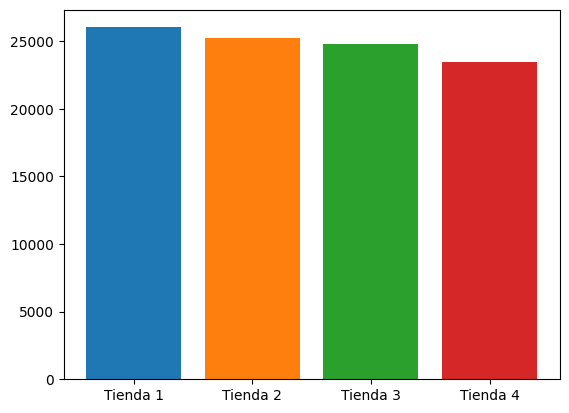

In [ ]:
promedio_costo_tiendas = promedio_costo_envio_tienda1, promedio_costo_envio_tienda2, promedio_costo_envio_tienda3, promedio_costo_envio_tienda4

fig, ax = plt.subplots()

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
promedio_costo_envio = promedio_costo_tiendas
bar_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

ax.bar(tiendas, promedio_costo_envio, color=bar_colors)

# 6. Análisis del desempeño geográfico

In [ ]:
heatmap_tienda1 =tienda1[['lat', 'lon']].values.tolist()
map_tienda1 = [tienda1['lat'].mean(), tienda1['lon'].mean()]
my_map_tienda1 = folium.Map(location=map_tienda1, zoom_start=11)
HeatMap(heatmap_tienda1).add_to(my_map_tienda1)
display(my_map_tienda1)


In [ ]:
heatmap_tienda2 =tienda2[['lat', 'lon']].values.tolist()
map_tienda2 = [tienda2['lat'].mean(), tienda2['lon'].mean()]
my_map_tienda2 = folium.Map(location=map_tienda2, zoom_start=11)
HeatMap(heatmap_tienda2).add_to(my_map_tienda2)
display(my_map_tienda2)

In [ ]:
heatmap_tienda3 =tienda3[['lat', 'lon']].values.tolist()
map_tienda3 = [tienda3['lat'].mean(), tienda3['lon'].mean()]
my_map_tienda3 = folium.Map(location=map_tienda3, zoom_start=11)
HeatMap(heatmap_tienda3).add_to(my_map_tienda3)
display(my_map_tienda3)

In [ ]:
heatmap_tienda4 =tienda4[['lat', 'lon']].values.tolist()
map_tienda4 = [tienda4['lat'].mean(), tienda4['lon'].mean()]
my_map_tienda4 = folium.Map(location=map_tienda4, zoom_start=11)
HeatMap(heatmap_tienda4).add_to(my_map_tienda4)
display(my_map_tienda4)

# a. Introducción

Para empezar se decidio realizar 6 tipos de analisis de las tiendas con el fin de informar el estado de cada una respecto a su rendimiento, importante mencionar sobre la información entregada la cual fue en archivos CSV para mejor rendimiento de la información, de los analisis realizados, algunos estan apoyados con graficos que permiten mejor el entendimiento del desempeño de las tiendas.

# b. Desarrollo
Respecto al analisis realizado se destaca la siguiente información asi:

1. Analisis de facturación: la tienda 1 obtuvo la mayor venta y la tienda 4 obtuvo la menor venta en el periodo.

2. Ventas por categoría: la tienda que obtuvo la mayor venta de categorias fue tienda 3 y la que obtuvo menor venta de categorias fue tienda 2, esto en base a las 3 categorias mas vendidas.

3. Calificación promedio de la tienda: la tienda 1 obtuvo la menor calificación con 3.98 y la tienda 3 con la mayor con 4.04

4. Productos más y menos vendidos: el producto mas vendido fue el TV LED UHD 4K en la tienda 1 y y el prodcuto menos vendido fue Cubo mágico 8x8 en tienda 3

5. Envío promedio por tienda: la tienda 1 obtuvo el mayor costo de envio y la tienda 4 el menor costo.

# c. Conclusión
A pesar de que la tienda 1 no es la mejor de las 4 tiendas entre los clientes, se puede mejorar su desempeño, el cual esta muy cerca de 4 sobre 5, ahora tenemos que, la tienda 4 reporta menores ingresos y menor costo de envio de las 4 tiendas, se sugiere lo siguiente: vender la tienda 4 y con la venta de esta, invertir el dinero en mejorar la atención al cliente de las 3 tiendas restantes, apostando por la fidelización del cliente a largo alcance.